# Solar Eclipse Classification

The aim of this project is to classify the data among the main types of Solar eclipses

In [1]:
import numpy as np #numerical operations
import pandas as pd #for EDA
import seaborn as sns #data visualization
import matplotlib.pyplot as plt #data visualization
%matplotlib inline
import warnings
warnings.filterwarnings("ignore") 

## Importing dataset

In [2]:
data = pd.read_csv("solar.csv")

In [3]:
data.head()

,Catalog Number,Calendar Date,Eclipse Time,Delta T (s),Lunation Number,Saros Number,Eclipse Type,Gamma,Eclipse Magnitude,Latitude,Longitude,Sun Altitude,Sun Azimuth,Path Width (km),Central Duration
0,1,-1999 June 12,03:14:51,46438,-49456,5,T,-0.2701,1.0733,6.0N,33.3W,74,344,247,06m37s
1,2,-1999 December 5,23:45:23,46426,-49450,10,A,-0.2317,0.9382,32.9S,10.8E,76,21,236,06m44s
2,3,-1998 June 1,18:09:16,46415,-49444,15,T,0.4994,1.0284,46.2N,83.4E,60,151,111,02m15s
3,4,-1998 November 25,05:57:03,46403,-49438,20,A,-0.9045,0.9806,67.8S,143.8W,25,74,162,01m14s
4,5,-1997 April 22,13:19:56,46393,-49433,-13,P,-1.4670,0.1611,60.6S,106.4W,0,281,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11898 entries, 0 to 11897
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Catalog Number     11898 non-null  int64  
 1   Calendar Date      11898 non-null  object 
 2   Eclipse Time       11898 non-null  object 
 3   Delta T (s)        11898 non-null  int64  
 4   Lunation Number    11898 non-null  int64  
 5   Saros Number       11898 non-null  int64  
 6   Eclipse Type       11898 non-null  object 
 7   Gamma              11898 non-null  float64
 8   Eclipse Magnitude  11898 non-null  float64
 9   Latitude           11898 non-null  object 
 10  Longitude          11898 non-null  object 
 11  Sun Altitude       11898 non-null  int64  
 12  Sun Azimuth        11898 non-null  int64  
 13  Path Width (km)    7698 non-null   object 
 14  Central Duration   7698 non-null   object 
dtypes: float64(2), int64(6), object(7)
memory usage: 1.4+ MB


In [5]:
data.shape

(11898, 15)

In [6]:
data.columns = data.columns.str.replace(' ','-') # replacing space between words with underscore
data.columns

Index(['Catalog-Number', 'Calendar-Date', 'Eclipse-Time', 'Delta-T-(s)',
       'Lunation-Number', 'Saros-Number', 'Eclipse-Type', 'Gamma',
       'Eclipse-Magnitude', 'Latitude', 'Longitude', 'Sun-Altitude',
       'Sun-Azimuth', 'Path-Width-(km)', 'Central-Duration'],
      dtype='object')

## Checking null values

In [7]:
data.isnull().sum()

Catalog-Number          0
Calendar-Date           0
Eclipse-Time            0
Delta-T-(s)             0
Lunation-Number         0
Saros-Number            0
Eclipse-Type            0
Gamma                   0
Eclipse-Magnitude       0
Latitude                0
Longitude               0
Sun-Altitude            0
Sun-Azimuth             0
Path-Width-(km)      4200
Central-Duration     4200
dtype: int64

In [8]:
data

,Catalog-Number,Calendar-Date,Eclipse-Time,Delta-T-(s),Lunation-Number,Saros-Number,Eclipse-Type,Gamma,Eclipse-Magnitude,Latitude,Longitude,Sun-Altitude,Sun-Azimuth,Path-Width-(km),Central-Duration
0,1,-1999 June 12,03:14:51,46438,-49456,5,T,-0.2701,1.0733,6.0N,33.3W,74,344,247,06m37s
1,2,-1999 December 5,23:45:23,46426,-49450,10,A,-0.2317,0.9382,32.9S,10.8E,76,21,236,06m44s
2,3,-1998 June 1,18:09:16,46415,-49444,15,T,0.4994,1.0284,46.2N,83.4E,60,151,111,02m15s
3,4,-1998 November 25,05:57:03,46403,-49438,20,A,-0.9045,0.9806,67.8S,143.8W,25,74,162,01m14s
4,5,-1997 April 22,13:19:56,46393,-49433,-13,P,-1.4670,0.1611,60.6S,106.4W,0,281,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11893,11894,2998 December 10,03:18:31,4414,12355,187,P,1.2838,0.4773,67.2N,145.0E,0,179,NaN,NaN
11894,11895,2999 May 6,23:23:57,4417,12360,154,T,0.8388,1.0566,71.5N,177.3E,33,146,345,03m25s
11895,11896,2999 October 30,09:34:33,4420,12366,159,A-,-1.0023,0.9586,70.9S,84.7W,0,137,-,-
11896,11897,3000 April 26,14:18:06,4424,12372,164,T,0.1310,1.0222,21.1N,18.4W,82,166,76,02m11s


## Filling null values with 0

In [9]:
for i in ['Path-Width-(km)','Central-Duration']:
    data[i].fillna('0',inplace=True)
data

,Catalog-Number,Calendar-Date,Eclipse-Time,Delta-T-(s),Lunation-Number,Saros-Number,Eclipse-Type,Gamma,Eclipse-Magnitude,Latitude,Longitude,Sun-Altitude,Sun-Azimuth,Path-Width-(km),Central-Duration
0,1,-1999 June 12,03:14:51,46438,-49456,5,T,-0.2701,1.0733,6.0N,33.3W,74,344,247,06m37s
1,2,-1999 December 5,23:45:23,46426,-49450,10,A,-0.2317,0.9382,32.9S,10.8E,76,21,236,06m44s
2,3,-1998 June 1,18:09:16,46415,-49444,15,T,0.4994,1.0284,46.2N,83.4E,60,151,111,02m15s
3,4,-1998 November 25,05:57:03,46403,-49438,20,A,-0.9045,0.9806,67.8S,143.8W,25,74,162,01m14s
4,5,-1997 April 22,13:19:56,46393,-49433,-13,P,-1.4670,0.1611,60.6S,106.4W,0,281,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11893,11894,2998 December 10,03:18:31,4414,12355,187,P,1.2838,0.4773,67.2N,145.0E,0,179,0,0
11894,11895,2999 May 6,23:23:57,4417,12360,154,T,0.8388,1.0566,71.5N,177.3E,33,146,345,03m25s
11895,11896,2999 October 30,09:34:33,4420,12366,159,A-,-1.0023,0.9586,70.9S,84.7W,0,137,-,-
11896,11897,3000 April 26,14:18:06,4424,12372,164,T,0.1310,1.0222,21.1N,18.4W,82,166,76,02m11s


## Dealing with the target variable and extracting only 4 main types of eclipses

In [10]:
data['Eclipse-Type'].value_counts()

P     3875
A     3755
T     3049
H      502
Pb     163
Pe     162
Am      72
Tm      72
An      36
A+      34
A-      34
H3      26
As      25
H2      24
Hm      17
T-      17
Tn      14
Ts      12
T+       9
Name: Eclipse-Type, dtype: int64

In [11]:
def Eclipse(x):  #4 types of lunar eclipse mentioned at the starting: P, A, T, H 
    if 'P' in x:
        return('P')
    if 'A' in x:
        return('A')
    if 'T' in x:
        return('T')
    if 'H' in x:
        return('H')

In [12]:
data['Eclipse-Type'] = list(map(Eclipse,data['Eclipse-Type']))
data['Eclipse-Type'].value_counts()

P    4200
A    3956
T    3173
H     569
Name: Eclipse-Type, dtype: int64

## Cleaning calender date column

In [13]:
def cleaningdate(x):     
    if '-' in x:
        x = x.replace('-','')
    return x

In [14]:
data['Calendar-Date'] = list(map(cleaningdate, data['Calendar-Date'])) 
data.head()

,Catalog-Number,Calendar-Date,Eclipse-Time,Delta-T-(s),Lunation-Number,Saros-Number,Eclipse-Type,Gamma,Eclipse-Magnitude,Latitude,Longitude,Sun-Altitude,Sun-Azimuth,Path-Width-(km),Central-Duration
0,1,1999 June 12,03:14:51,46438,-49456,5,T,-0.2701,1.0733,6.0N,33.3W,74,344,247,06m37s
1,2,1999 December 5,23:45:23,46426,-49450,10,A,-0.2317,0.9382,32.9S,10.8E,76,21,236,06m44s
2,3,1998 June 1,18:09:16,46415,-49444,15,T,0.4994,1.0284,46.2N,83.4E,60,151,111,02m15s
3,4,1998 November 25,05:57:03,46403,-49438,20,A,-0.9045,0.9806,67.8S,143.8W,25,74,162,01m14s
4,5,1997 April 22,13:19:56,46393,-49433,-13,P,-1.4670,0.1611,60.6S,106.4W,0,281,0,0


In [15]:
from datetime import timedelta
import re
from datetime import datetime

In [16]:
calendar_date = data['Calendar-Date'].str.split(' ')
calendar_date

0            [1999, June, 12]
1         [1999, December, 5]
2             [1998, June, 1]
3        [1998, November, 25]
4           [1997, April, 22]
                 ...         
11893    [2998, December, 10]
11894          [2999, May, 6]
11895     [2999, October, 30]
11896       [3000, April, 26]
11897     [3000, October, 19]
Name: Calendar-Date, Length: 11898, dtype: object

In [17]:
data['Calendar-Year'] = calendar_date.str[0]
data['Calendar-Month'] = calendar_date.str[1]
data['Calendar-Day'] = calendar_date.str[2].astype(float)

In [18]:
data.dtypes

Catalog-Number         int64
Calendar-Date         object
Eclipse-Time          object
Delta-T-(s)            int64
Lunation-Number        int64
Saros-Number           int64
Eclipse-Type          object
Gamma                float64
Eclipse-Magnitude    float64
Latitude              object
Longitude             object
Sun-Altitude           int64
Sun-Azimuth            int64
Path-Width-(km)       object
Central-Duration      object
Calendar-Year         object
Calendar-Month        object
Calendar-Day         float64
dtype: object

In [19]:
data.head()

,Catalog-Number,Calendar-Date,Eclipse-Time,Delta-T-(s),Lunation-Number,Saros-Number,Eclipse-Type,Gamma,Eclipse-Magnitude,Latitude,Longitude,Sun-Altitude,Sun-Azimuth,Path-Width-(km),Central-Duration,Calendar-Year,Calendar-Month,Calendar-Day
0,1,1999 June 12,03:14:51,46438,-49456,5,T,-0.2701,1.0733,6.0N,33.3W,74,344,247,06m37s,1999,June,12.0
1,2,1999 December 5,23:45:23,46426,-49450,10,A,-0.2317,0.9382,32.9S,10.8E,76,21,236,06m44s,1999,December,5.0
2,3,1998 June 1,18:09:16,46415,-49444,15,T,0.4994,1.0284,46.2N,83.4E,60,151,111,02m15s,1998,June,1.0
3,4,1998 November 25,05:57:03,46403,-49438,20,A,-0.9045,0.9806,67.8S,143.8W,25,74,162,01m14s,1998,November,25.0
4,5,1997 April 22,13:19:56,46393,-49433,-13,P,-1.4670,0.1611,60.6S,106.4W,0,281,0,0,1997,April,22.0


In [20]:
data.isnull().sum()

Catalog-Number       0
Calendar-Date        0
Eclipse-Time         0
Delta-T-(s)          0
Lunation-Number      0
Saros-Number         0
Eclipse-Type         0
Gamma                0
Eclipse-Magnitude    0
Latitude             0
Longitude            0
Sun-Altitude         0
Sun-Azimuth          0
Path-Width-(km)      0
Central-Duration     0
Calendar-Year        0
Calendar-Month       0
Calendar-Day         0
dtype: int64

## Splitting Eclipse Time column in hours minutes and seconds

In [21]:
def change_into_datetime(col):
    data[col] = pd.to_datetime(data[col])

In [22]:
for i in ['Eclipse-Time']:
    change_into_datetime(i)

In [23]:
data.dtypes

Catalog-Number                int64
Calendar-Date                object
Eclipse-Time         datetime64[ns]
Delta-T-(s)                   int64
Lunation-Number               int64
Saros-Number                  int64
Eclipse-Type                 object
Gamma                       float64
Eclipse-Magnitude           float64
Latitude                     object
Longitude                    object
Sun-Altitude                  int64
Sun-Azimuth                   int64
Path-Width-(km)              object
Central-Duration             object
Calendar-Year                object
Calendar-Month               object
Calendar-Day                float64
dtype: object

In [24]:
data['Eclipse-Time']

0       2022-11-08 03:14:51
1       2022-11-08 23:45:23
2       2022-11-08 18:09:16
3       2022-11-08 05:57:03
4       2022-11-08 13:19:56
                ...        
11893   2022-11-08 03:18:31
11894   2022-11-08 23:23:57
11895   2022-11-08 09:34:33
11896   2022-11-08 14:18:06
11897   2022-11-08 16:10:16
Name: Eclipse-Time, Length: 11898, dtype: datetime64[ns]

In [25]:
def extract_hour(df,col):
    data[col + '-hour'] = data[col].dt.hour
  
def extract_minute(df,col):
    data[col + '-minute'] = data[col].dt.minute

def extract_seconds(df,col):
    data[col + '-seconds'] = data[col].dt.second

In [26]:
extract_hour(data,'Eclipse-Time')
extract_minute(data,'Eclipse-Time')
extract_seconds(data,'Eclipse-Time')

In [27]:
data.drop(['Eclipse-Time'],axis=1,inplace=True)

In [28]:
data.drop(['Calendar-Date','Catalog-Number'],axis=1,inplace=True)

In [29]:
data.head()

,Delta-T-(s),Lunation-Number,Saros-Number,Eclipse-Type,Gamma,Eclipse-Magnitude,Latitude,Longitude,Sun-Altitude,Sun-Azimuth,Path-Width-(km),Central-Duration,Calendar-Year,Calendar-Month,Calendar-Day,Eclipse-Time-hour,Eclipse-Time-minute,Eclipse-Time-seconds
0,46438,-49456,5,T,-0.2701,1.0733,6.0N,33.3W,74,344,247,06m37s,1999,June,12.0,3,14,51
1,46426,-49450,10,A,-0.2317,0.9382,32.9S,10.8E,76,21,236,06m44s,1999,December,5.0,23,45,23
2,46415,-49444,15,T,0.4994,1.0284,46.2N,83.4E,60,151,111,02m15s,1998,June,1.0,18,9,16
3,46403,-49438,20,A,-0.9045,0.9806,67.8S,143.8W,25,74,162,01m14s,1998,November,25.0,5,57,3
4,46393,-49433,-13,P,-1.4670,0.1611,60.6S,106.4W,0,281,0,0,1997,April,22.0,13,19,56


## Splitting Latitude and Longitude Column with appropriate direction and magnitude

In [30]:
data['Latitude-number'] = data['Latitude'].str.slice(stop=-1)
data["Latitude-number"] = pd.to_numeric(data["Latitude-number"])
data['Latitude-letter'] = data['Latitude'].str.slice(start=-1)

In [31]:
data['Longitude-number'] = data['Longitude'].str.slice(stop=-1)
data["Longitude-number"] = pd.to_numeric(data["Longitude-number"])
data['Longitude-letter'] = data['Longitude'].str.slice(start=-1)

In [32]:
data.drop(['Latitude','Longitude'],axis=1,inplace=True)

In [33]:
data

,Delta-T-(s),Lunation-Number,Saros-Number,Eclipse-Type,Gamma,Eclipse-Magnitude,Sun-Altitude,Sun-Azimuth,Path-Width-(km),Central-Duration,Calendar-Year,Calendar-Month,Calendar-Day,Eclipse-Time-hour,Eclipse-Time-minute,Eclipse-Time-seconds,Latitude-number,Latitude-letter,Longitude-number,Longitude-letter
0,46438,-49456,5,T,-0.2701,1.0733,74,344,247,06m37s,1999,June,12.0,3,14,51,6.0,N,33.3,W
1,46426,-49450,10,A,-0.2317,0.9382,76,21,236,06m44s,1999,December,5.0,23,45,23,32.9,S,10.8,E
2,46415,-49444,15,T,0.4994,1.0284,60,151,111,02m15s,1998,June,1.0,18,9,16,46.2,N,83.4,E
3,46403,-49438,20,A,-0.9045,0.9806,25,74,162,01m14s,1998,November,25.0,5,57,3,67.8,S,143.8,W
4,46393,-49433,-13,P,-1.4670,0.1611,0,281,0,0,1997,April,22.0,13,19,56,60.6,S,106.4,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11893,4414,12355,187,P,1.2838,0.4773,0,179,0,0,2998,December,10.0,3,18,31,67.2,N,145.0,E
11894,4417,12360,154,T,0.8388,1.0566,33,146,345,03m25s,2999,May,6.0,23,23,57,71.5,N,177.3,E
11895,4420,12366,159,A,-1.0023,0.9586,0,137,-,-,2999,October,30.0,9,34,33,70.9,S,84.7,W
11896,4424,12372,164,T,0.1310,1.0222,82,166,76,02m11s,3000,April,26.0,14,18,6,21.1,N,18.4,W


In [34]:
data.dtypes

Delta-T-(s)               int64
Lunation-Number           int64
Saros-Number              int64
Eclipse-Type             object
Gamma                   float64
Eclipse-Magnitude       float64
Sun-Altitude              int64
Sun-Azimuth               int64
Path-Width-(km)          object
Central-Duration         object
Calendar-Year            object
Calendar-Month           object
Calendar-Day            float64
Eclipse-Time-hour         int64
Eclipse-Time-minute       int64
Eclipse-Time-seconds      int64
Latitude-number         float64
Latitude-letter          object
Longitude-number        float64
Longitude-letter         object
dtype: object

## Splitting central duration time in minutes and seconds

In [35]:
data['Duration-minutes'] = data['Central-Duration'].str.slice(stop=2)
data['Duration-seconds'] = data['Central-Duration'].str.slice(start=3,stop=-1)
data.drop(['Central-Duration'],axis=1,inplace=True)
data.head()

,Delta-T-(s),Lunation-Number,Saros-Number,Eclipse-Type,Gamma,Eclipse-Magnitude,Sun-Altitude,Sun-Azimuth,Path-Width-(km),Calendar-Year,...,Calendar-Day,Eclipse-Time-hour,Eclipse-Time-minute,Eclipse-Time-seconds,Latitude-number,Latitude-letter,Longitude-number,Longitude-letter,Duration-minutes,Duration-seconds
0,46438,-49456,5,T,-0.2701,1.0733,74,344,247,1999,...,12.0,3,14,51,6.0,N,33.3,W,06,37
1,46426,-49450,10,A,-0.2317,0.9382,76,21,236,1999,...,5.0,23,45,23,32.9,S,10.8,E,06,44
2,46415,-49444,15,T,0.4994,1.0284,60,151,111,1998,...,1.0,18,9,16,46.2,N,83.4,E,02,15
3,46403,-49438,20,A,-0.9045,0.9806,25,74,162,1998,...,25.0,5,57,3,67.8,S,143.8,W,01,14
4,46393,-49433,-13,P,-1.4670,0.1611,0,281,0,1997,...,22.0,13,19,56,60.6,S,106.4,W,0,


In [36]:
data.isnull().sum()

Delta-T-(s)             0
Lunation-Number         0
Saros-Number            0
Eclipse-Type            0
Gamma                   0
Eclipse-Magnitude       0
Sun-Altitude            0
Sun-Azimuth             0
Path-Width-(km)         0
Calendar-Year           0
Calendar-Month          0
Calendar-Day            0
Eclipse-Time-hour       0
Eclipse-Time-minute     0
Eclipse-Time-seconds    0
Latitude-number         0
Latitude-letter         0
Longitude-number        0
Longitude-letter        0
Duration-minutes        0
Duration-seconds        0
dtype: int64

## One-Hot Encoding for latitude and longitude direction

In [37]:
lat = pd.get_dummies(data['Latitude-letter'])
lon = pd.get_dummies(data['Longitude-letter'])

data = pd.concat([data,lat,lon],axis=1)

data.drop(['Latitude-letter','Longitude-letter'],axis=1,inplace=True)

data.head()

,Delta-T-(s),Lunation-Number,Saros-Number,Eclipse-Type,Gamma,Eclipse-Magnitude,Sun-Altitude,Sun-Azimuth,Path-Width-(km),Calendar-Year,...,Eclipse-Time-minute,Eclipse-Time-seconds,Latitude-number,Longitude-number,Duration-minutes,Duration-seconds,N,S,E,W
0,46438,-49456,5,T,-0.2701,1.0733,74,344,247,1999,...,14,51,6.0,33.3,06,37,1,0,0,1
1,46426,-49450,10,A,-0.2317,0.9382,76,21,236,1999,...,45,23,32.9,10.8,06,44,0,1,1,0
2,46415,-49444,15,T,0.4994,1.0284,60,151,111,1998,...,9,16,46.2,83.4,02,15,1,0,1,0
3,46403,-49438,20,A,-0.9045,0.9806,25,74,162,1998,...,57,3,67.8,143.8,01,14,0,1,0,1
4,46393,-49433,-13,P,-1.4670,0.1611,0,281,0,1997,...,19,56,60.6,106.4,0,,0,1,0,1


## Label encoding for calender month to convert it to numeric data type between 1-12

In [38]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

for i in ['Calendar-Month']:
    data[i] = label.fit_transform(data[i])

data.head()

,Delta-T-(s),Lunation-Number,Saros-Number,Eclipse-Type,Gamma,Eclipse-Magnitude,Sun-Altitude,Sun-Azimuth,Path-Width-(km),Calendar-Year,...,Eclipse-Time-minute,Eclipse-Time-seconds,Latitude-number,Longitude-number,Duration-minutes,Duration-seconds,N,S,E,W
0,46438,-49456,5,T,-0.2701,1.0733,74,344,247,1999,...,14,51,6.0,33.3,06,37,1,0,0,1
1,46426,-49450,10,A,-0.2317,0.9382,76,21,236,1999,...,45,23,32.9,10.8,06,44,0,1,1,0
2,46415,-49444,15,T,0.4994,1.0284,60,151,111,1998,...,9,16,46.2,83.4,02,15,1,0,1,0
3,46403,-49438,20,A,-0.9045,0.9806,25,74,162,1998,...,57,3,67.8,143.8,01,14,0,1,0,1
4,46393,-49433,-13,P,-1.4670,0.1611,0,281,0,1997,...,19,56,60.6,106.4,0,,0,1,0,1


## Convert object to numeric data types

In [39]:
data['Path-Width-(km)'] = list(map(cleaningdate, data['Path-Width-(km)'])) 
data['Duration-minutes'] = list(map(cleaningdate, data['Duration-minutes']))
data['Duration-seconds'] = list(map(cleaningdate, data['Duration-seconds']))

data["Path-Width-(km)"] = pd.to_numeric(data["Path-Width-(km)"])
data["Duration-minutes"] = pd.to_numeric(data["Duration-minutes"])
data["Duration-seconds"] = pd.to_numeric(data["Duration-seconds"])
data["Calendar-Year"] = pd.to_numeric(data["Calendar-Year"])

data.dtypes

Delta-T-(s)               int64
Lunation-Number           int64
Saros-Number              int64
Eclipse-Type             object
Gamma                   float64
Eclipse-Magnitude       float64
Sun-Altitude              int64
Sun-Azimuth               int64
Path-Width-(km)         float64
Calendar-Year             int64
Calendar-Month            int64
Calendar-Day            float64
Eclipse-Time-hour         int64
Eclipse-Time-minute       int64
Eclipse-Time-seconds      int64
Latitude-number         float64
Longitude-number        float64
Duration-minutes        float64
Duration-seconds        float64
N                         uint8
S                         uint8
E                         uint8
W                         uint8
dtype: object

In [40]:
data.isnull().sum()

Delta-T-(s)                0
Lunation-Number            0
Saros-Number               0
Eclipse-Type               0
Gamma                      0
Eclipse-Magnitude          0
Sun-Altitude               0
Sun-Azimuth                0
Path-Width-(km)          181
Calendar-Year              0
Calendar-Month             0
Calendar-Day               0
Eclipse-Time-hour          0
Eclipse-Time-minute        0
Eclipse-Time-seconds       0
Latitude-number            0
Longitude-number           0
Duration-minutes          94
Duration-seconds        4294
N                          0
S                          0
E                          0
W                          0
dtype: int64

In [41]:
data = data.drop(['Duration-seconds'], axis = 1)
data = data.dropna(axis=0, subset=['Path-Width-(km)','Duration-minutes'])

data.isnull().sum()

Delta-T-(s)             0
Lunation-Number         0
Saros-Number            0
Eclipse-Type            0
Gamma                   0
Eclipse-Magnitude       0
Sun-Altitude            0
Sun-Azimuth             0
Path-Width-(km)         0
Calendar-Year           0
Calendar-Month          0
Calendar-Day            0
Eclipse-Time-hour       0
Eclipse-Time-minute     0
Eclipse-Time-seconds    0
Latitude-number         0
Longitude-number        0
Duration-minutes        0
N                       0
S                       0
E                       0
W                       0
dtype: int64

## Can test models now as all independent features are of numeric data type

In [42]:
X = data.drop('Eclipse-Type', axis=1)


data_extract = X.copy()

X.head()

,Delta-T-(s),Lunation-Number,Saros-Number,Gamma,Eclipse-Magnitude,Sun-Altitude,Sun-Azimuth,Path-Width-(km),Calendar-Year,Calendar-Month,...,Eclipse-Time-hour,Eclipse-Time-minute,Eclipse-Time-seconds,Latitude-number,Longitude-number,Duration-minutes,N,S,E,W
0,46438,-49456,5,-0.2701,1.0733,74,344,247.0,1999,6,...,3,14,51,6.0,33.3,6.0,1,0,0,1
1,46426,-49450,10,-0.2317,0.9382,76,21,236.0,1999,2,...,23,45,23,32.9,10.8,6.0,0,1,1,0
2,46415,-49444,15,0.4994,1.0284,60,151,111.0,1998,6,...,18,9,16,46.2,83.4,2.0,1,0,1,0
3,46403,-49438,20,-0.9045,0.9806,25,74,162.0,1998,9,...,5,57,3,67.8,143.8,1.0,0,1,0,1
4,46393,-49433,-13,-1.4670,0.1611,0,281,0.0,1997,0,...,13,19,56,60.6,106.4,0.0,0,1,0,1


In [43]:
X.shape

(11717, 21)

## Correlation between features 

In [44]:
corr_matrix = X.corr()
corr_matrix.head()

,Delta-T-(s),Lunation-Number,Saros-Number,Gamma,Eclipse-Magnitude,Sun-Altitude,Sun-Azimuth,Path-Width-(km),Calendar-Year,Calendar-Month,...,Eclipse-Time-hour,Eclipse-Time-minute,Eclipse-Time-seconds,Latitude-number,Longitude-number,Duration-minutes,N,S,E,W
Delta-T-(s),1.000000,-0.896359,-0.862441,0.000095,-0.011061,-0.002113,0.000227,0.000525,-0.122210,0.001112,...,0.005673,0.004626,0.009893,-0.001594,-0.001658,-0.005875,-0.002635,0.002635,-0.009575,0.009575
Lunation-Number,-0.896359,1.000000,0.965620,-0.001697,0.001296,0.001018,0.001077,-0.001841,0.532083,0.001013,...,0.000060,-0.001373,-0.008802,0.004753,0.002840,0.003991,0.001320,-0.001320,0.012499,-0.012499
Saros-Number,-0.862441,0.965620,1.000000,-0.003157,0.000990,0.001077,-0.038596,-0.000514,0.519580,0.016158,...,0.002238,-0.000345,-0.009079,0.004489,0.002267,0.004639,0.001927,-0.001927,0.010985,-0.010985
Gamma,0.000095,-0.001697,-0.003157,1.000000,0.004796,0.003100,-0.003028,-0.008201,-0.001532,0.009435,...,-0.000395,0.002259,-0.003236,-0.000175,0.000049,0.001370,0.835511,-0.835511,0.003579,-0.003579
Eclipse-Magnitude,-0.011061,0.001296,0.000990,0.004796,1.000000,0.709351,0.002964,0.482561,-0.012602,-0.001626,...,-0.003334,0.001386,-0.006086,-0.565436,-0.003411,0.500854,0.011577,-0.011577,0.002277,-0.002277


## Heatmap for correlation matrix

<AxesSubplot:>

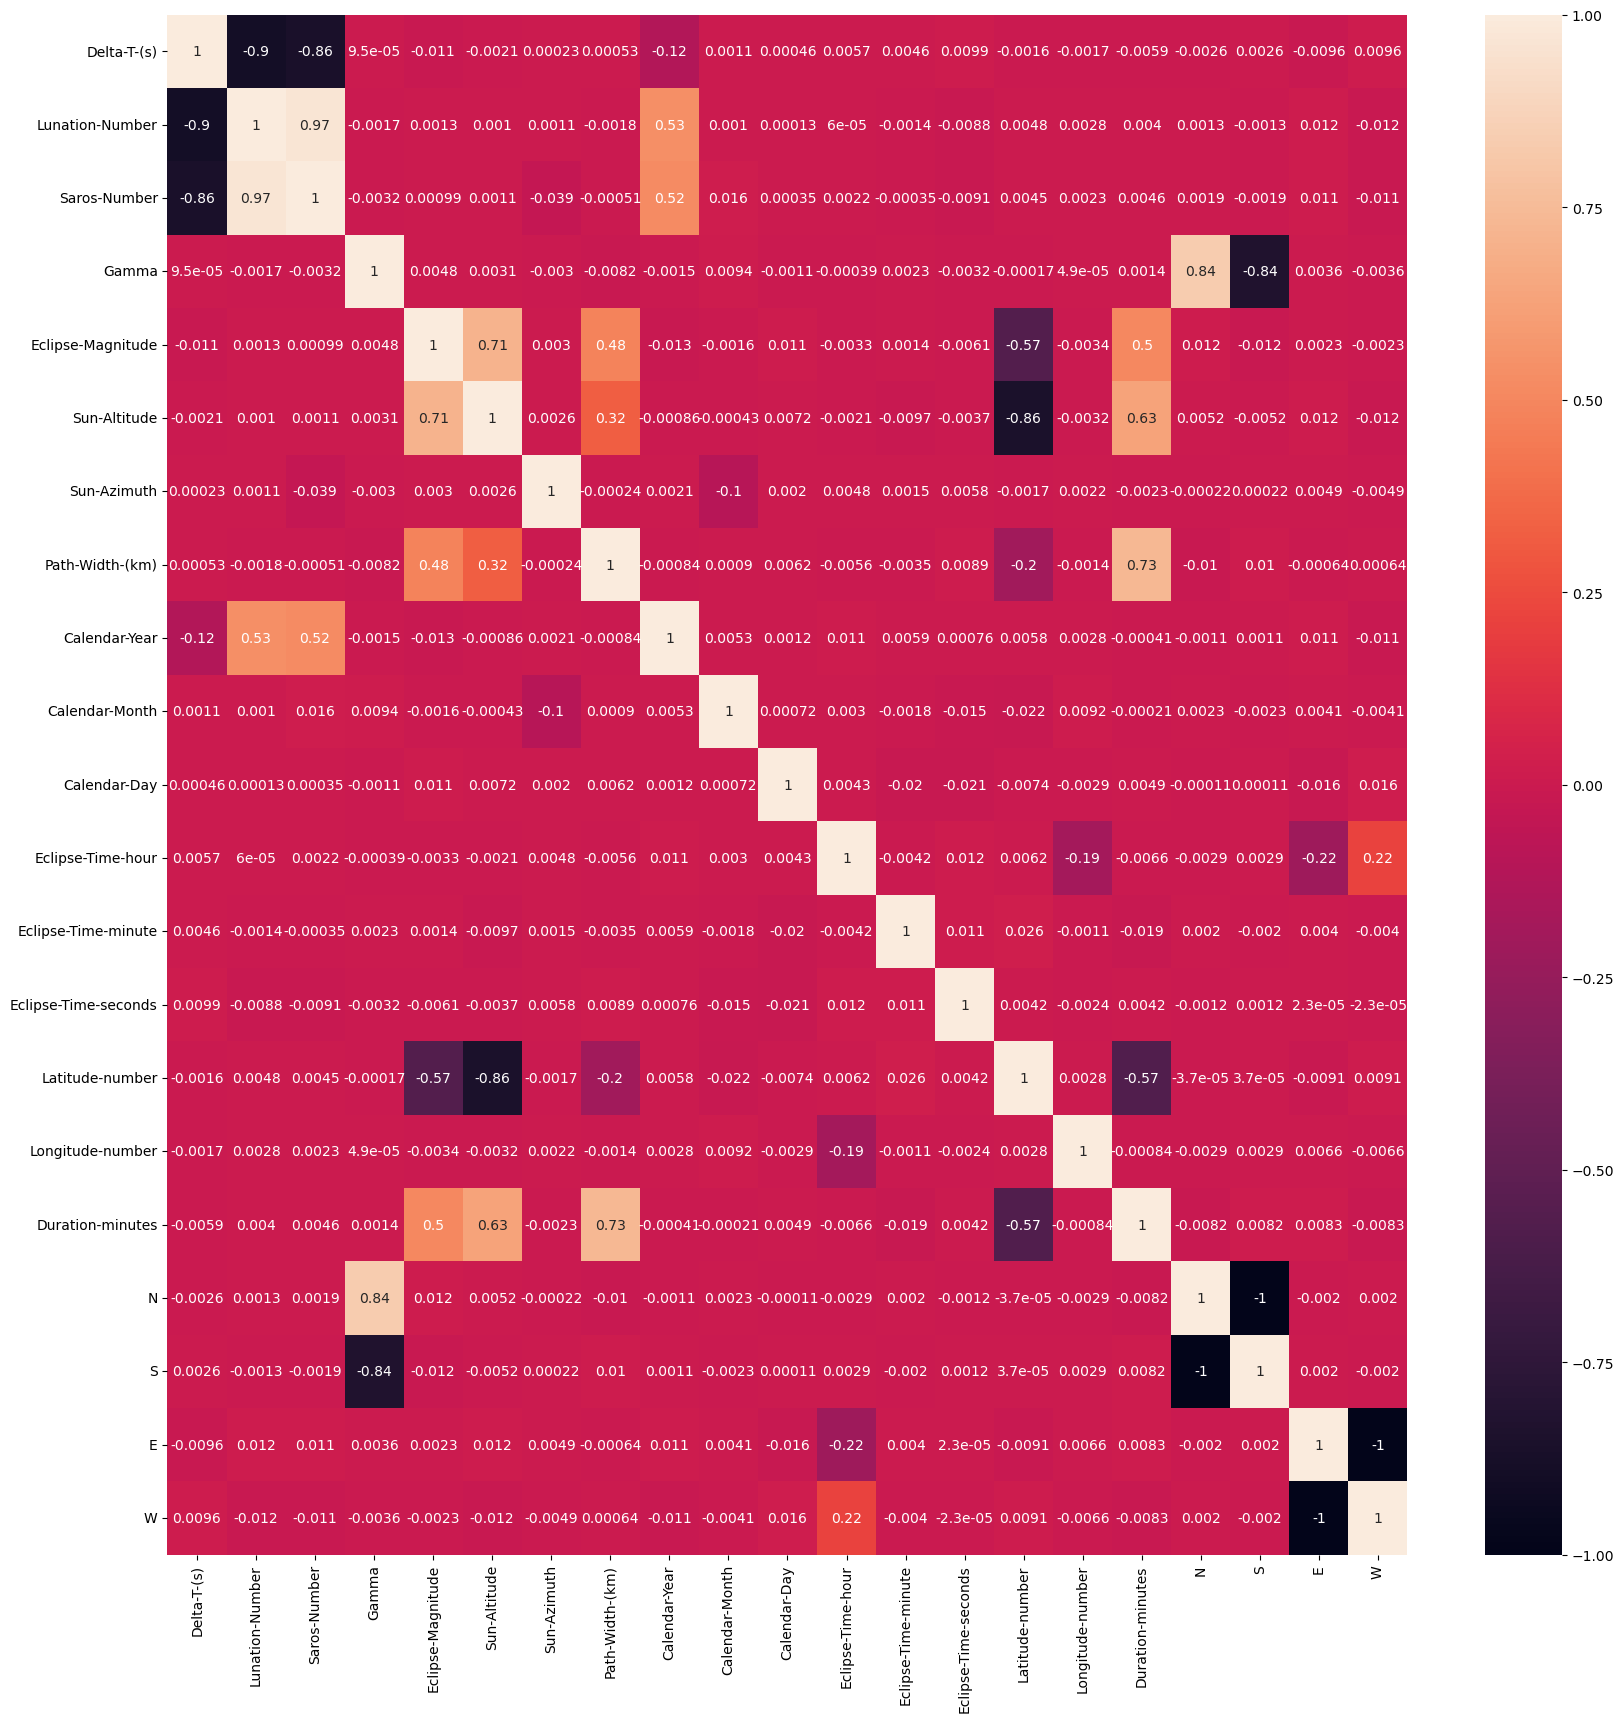

In [45]:
fig, ax = plt.subplots(figsize=(20,20))
heatmap = sns.heatmap(corr_matrix, annot =True, ax=ax)
heatmap

## Perform feature scaling

In [46]:
from sklearn import preprocessing

X = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(X_scaled)

X

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.000000,0.000000,0.088670,0.413715,0.992601,0.822222,0.955556,0.174066,0.666333,0.545455,...,0.130435,0.237288,0.864407,0.067039,0.185000,0.500000,1.0,0.0,0.0,1.0
1,0.999742,0.000097,0.113300,0.425946,0.867659,0.844444,0.058333,0.166314,0.666333,0.181818,...,1.000000,0.762712,0.389831,0.367598,0.060000,0.500000,0.0,1.0,1.0,0.0
2,0.999505,0.000194,0.137931,0.658810,0.951077,0.666667,0.419444,0.078224,0.666000,0.545455,...,0.782609,0.152542,0.271186,0.516201,0.463333,0.166667,1.0,0.0,1.0,0.0
3,0.999246,0.000291,0.162562,0.211651,0.906871,0.277778,0.205556,0.114165,0.666000,0.818182,...,0.217391,0.966102,0.050847,0.757542,0.798889,0.083333,0.0,1.0,0.0,1.0
4,0.999031,0.000372,0.000000,0.032488,0.148987,0.000000,0.780556,0.000000,0.665667,0.000000,...,0.565217,0.322034,0.949153,0.677095,0.591111,0.000000,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11712,0.095082,0.999531,0.960591,0.176201,0.905577,0.000000,0.025000,0.000000,0.999333,0.545455,...,0.608696,0.830508,0.457627,0.743017,0.180556,0.000000,0.0,1.0,0.0,1.0
11713,0.095168,0.999628,0.985222,0.908651,0.441413,0.000000,0.497222,0.000000,0.999333,0.181818,...,0.130435,0.305085,0.525424,0.750838,0.805556,0.000000,1.0,0.0,1.0,0.0
11714,0.095233,0.999709,0.822660,0.766913,0.977157,0.366667,0.405556,0.243129,0.999667,0.727273,...,1.000000,0.389831,0.966102,0.798883,0.985000,0.250000,1.0,0.0,1.0,0.0
11715,0.095384,0.999903,0.871921,0.541470,0.945344,0.911111,0.461111,0.053559,1.000000,0.000000,...,0.608696,0.305085,0.101695,0.235754,0.102222,0.166667,1.0,0.0,0.0,1.0


In [47]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(X)
X_normalized = transformer.transform(X)
pd.DataFrame(X_normalized)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.358773,0.000000,0.031812,0.148430,0.356119,0.294991,0.342828,0.062450,0.239062,0.195694,...,0.046796,0.085133,0.310126,0.024052,0.066373,0.179386,0.358773,0.000000,0.000000,0.358773
1,0.369819,0.000036,0.041911,0.157563,0.320959,0.312372,0.021578,0.061522,0.246486,0.067257,...,0.369914,0.282138,0.144204,0.135980,0.022195,0.184957,0.000000,0.369914,0.369914,0.000000
2,0.379341,0.000074,0.052349,0.250038,0.360962,0.253020,0.159191,0.029688,0.252767,0.207016,...,0.297023,0.057894,0.102923,0.195913,0.175849,0.063255,0.379529,0.000000,0.379529,0.000000
3,0.353734,0.000103,0.057547,0.074925,0.321033,0.098334,0.072767,0.040414,0.235765,0.289637,...,0.076957,0.342001,0.018000,0.268170,0.282807,0.029500,0.000000,0.354001,0.000000,0.354001
4,0.386085,0.000144,0.000000,0.012555,0.057578,0.000000,0.301653,0.000000,0.257253,0.000000,...,0.218434,0.124453,0.366809,0.261670,0.228441,0.000000,0.000000,0.386460,0.000000,0.386460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11712,0.033304,0.350101,0.336462,0.061717,0.317192,0.000000,0.008757,0.000000,0.350032,0.191054,...,0.213205,0.290898,0.160291,0.260253,0.063242,0.000000,0.000000,0.350265,0.000000,0.350265
11713,0.033716,0.354147,0.349043,0.321916,0.156383,0.000000,0.176155,0.000000,0.354043,0.064414,...,0.046210,0.108085,0.186147,0.266006,0.285391,0.000000,0.354279,0.000000,0.354279,0.000000
11714,0.028847,0.302823,0.249193,0.232306,0.295992,0.111067,0.122847,0.073646,0.302810,0.220299,...,0.302911,0.118084,0.292643,0.241990,0.298367,0.075728,0.302911,0.000000,0.302911,0.000000
11715,0.033181,0.347831,0.303310,0.188358,0.328851,0.316943,0.160404,0.018631,0.347864,0.000000,...,0.211743,0.106128,0.035376,0.082010,0.035559,0.057977,0.347864,0.000000,0.000000,0.347864


## Visualization of target variable

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

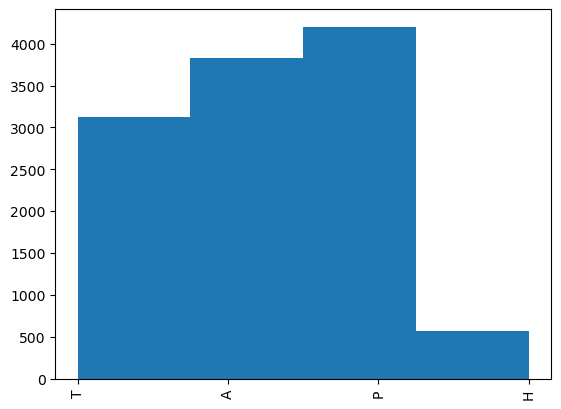

In [48]:
plt.hist(data["Eclipse-Type"], bins = len(data["Eclipse-Type"].unique()))
plt.xticks(rotation='vertical')

In [49]:
y = data['Eclipse-Type']
y.head()

0    T
1    A
2    T
3    A
4    P
Name: Eclipse-Type, dtype: object

In [50]:
y.shape

(11717,)

In [51]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()  
y = le.fit_transform(y)
y

array([3, 0, 3, ..., 3, 3, 1])

## Splitting dataset into training and test

In [52]:
data_normalized = X_normalized.copy()

from sklearn.model_selection import train_test_split

X_full_train, X_test, y_full_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=259)
X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size=0.25, random_state=259)

print(X_full_train.shape, y_full_train.shape)
print(X_val.shape, y_val.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(9373, 21) (9373,)
(2344, 21) (2344,)
(7029, 21) (7029,)
(2344, 21) (2344,)


## Using Logistic Regression

In [53]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(C=1.0,max_iter=1000, random_state=259)

log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=259)

In [54]:
pd.DataFrame(y_val)

,0
0,0
1,0
2,3
3,3
4,2
...,...
2339,2
2340,0
2341,3
2342,2


In [55]:
from sklearn.metrics import classification_report, accuracy_score

predictions = log_model.predict(pd.DataFrame(X_val))

In [56]:
print(classification_report(y_val, predictions))
print(accuracy_score(y_val, predictions))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84       766
           1       0.54      0.13      0.21       113
           2       0.99      1.00      0.99       868
           3       0.70      0.84      0.76       597

    accuracy                           0.85      2344
   macro avg       0.77      0.69      0.70      2344
weighted avg       0.85      0.85      0.84      2344

0.8545221843003413


## Validation Accuracy - 85.45%

## Using Random Forest Algorithm

In [57]:
from sklearn.ensemble import RandomForestClassifier

randomForestClassification = RandomForestClassifier(n_estimators=100,random_state=259)
randomForestClassification.fit(X_train, y_train)
y_pred = randomForestClassification.predict(X_val)

In [58]:
pd.Series(y_pred).value_counts()

2    868
0    754
3    600
1    122
dtype: int64

In [59]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_val,y_pred))
print(accuracy_score(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       766
           1       0.71      0.77      0.74       113
           2       1.00      1.00      1.00       868
           3       0.98      0.98      0.98       597

    accuracy                           0.96      2344
   macro avg       0.91      0.92      0.92      2344
weighted avg       0.97      0.96      0.96      2344

0.9641638225255973


## Validation Accuracy - 96.41%

In [60]:
randomForestClassification.feature_importances_

array([0.01197719, 0.01103681, 0.01243038, 0.04571076, 0.20200166,
       0.16629805, 0.01332861, 0.15437883, 0.01377501, 0.01203116,
       0.00952997, 0.00894452, 0.00949286, 0.00972385, 0.0531281 ,
       0.00976734, 0.15711945, 0.02392069, 0.02757544, 0.02579871,
       0.02203063])

## Using Support Vector Machine(SVM)

In [61]:
from sklearn.svm import SVC
clf = SVC(kernel='linear',random_state=259) 
  
clf.fit(X_train, y_train)
predictions_svm = clf.predict(X_val)

In [62]:
print(classification_report(y_val, predictions_svm))
print(accuracy_score(y_val, predictions_svm))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88       766
           1       0.00      0.00      0.00       113
           2       1.00      1.00      1.00       868
           3       0.77      0.98      0.86       597

    accuracy                           0.90      2344
   macro avg       0.67      0.71      0.69      2344
weighted avg       0.86      0.90      0.88      2344

0.8984641638225256


## Validation Accuracy - 89.84%

## Using XGBoost

In [63]:
import xgboost as xgb

XGBclassifier = xgb.XGBClassifier(random_state=259)
XGBclassifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [64]:
y_pred = XGBclassifier.predict(X_val)

In [65]:
pd.Series(y_pred).value_counts()

2    868
0    756
3    597
1    123
dtype: int64

In [66]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_val,y_pred))
print(accuracy_score(y_val, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.97      0.97       766
           1       0.80      0.88      0.84       113
           2       1.00      1.00      1.00       868
           3       0.99      0.99      0.99       597

    accuracy                           0.98      2344
   macro avg       0.94      0.96      0.95      2344
weighted avg       0.98      0.98      0.98      2344

0.9812286689419796


## Validation Accuracy 98.12%

## Printing Confusion matrix for best model

In [67]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_val, y_pred)
print(confusion_matrix)

[[741  21   0   4]
 [ 13  99   0   1]
 [  0   0 868   0]
 [  2   3   0 592]]


<AxesSubplot:>

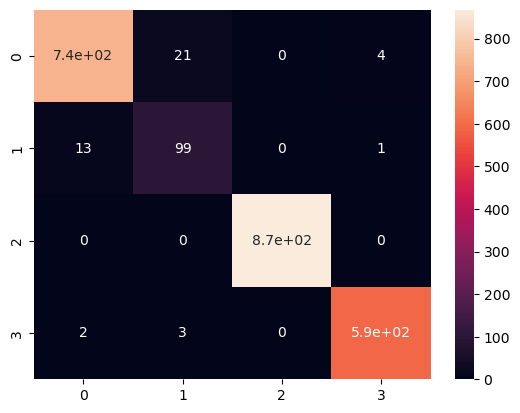

In [68]:
import seaborn as sns
sns.heatmap(confusion_matrix, annot=True)

## Hyperparameter Tuning using RandomisedSearchCV

In [74]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=6)]
max_depth = [int(x) for x in np.linspace(start=5,stop=30,num=4)]

random_params = {
    'n_estimators':n_estimators,
    'max_features':['sqrt'],
    'max_depth':max_depth,
    'min_samples_split':[5,10,15,100]
}



random_params

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [75]:
rf = RandomForestClassifier()

hypertuned_classifier =  RandomizedSearchCV(
    estimator=rf,
    param_distributions=random_params,
    cv=5,
    verbose=2,
    n_jobs=-1
)

hypertuned_classifier.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [76]:
hypertuned_classifier.best_params_

{'n_estimators': 540,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 30}

In [77]:
predictions = hypertuned_classifier.predict(X_val)

print(classification_report(y_val,predictions))
print(accuracy_score(y_val, predictions))



              precision    recall  f1-score   support

           0       0.96      0.94      0.95       766
           1       0.72      0.83      0.77       113
           2       1.00      1.00      1.00       868
           3       0.98      0.98      0.98       597

    accuracy                           0.97      2344
   macro avg       0.92      0.94      0.93      2344
weighted avg       0.97      0.97      0.97      2344

0.9675767918088737


## Validation Accuracy 96.75%

## Comparing all models XGBoost gives highest accuracy

In [78]:
import bentoml

bentoml.xgboost.save_model("solar_eclipse_classification", XGBclassifier,
                          custom_objects={
                              "minmaxscaler": min_max_scaler,
                              "normalizer" : transformer,
                              "labelencoder": le
                          })

Model(tag="solar_eclipse_classification:v62r4ms7n6weefja", path="/home/regidan/bentoml/models/solar_eclipse_classification/v62r4ms7n6weefja/")

In [79]:
data_extract.iloc[-3].values

array([4.4170e+03, 1.2360e+04, 1.5400e+02, 8.3880e-01, 1.0566e+00,
       3.3000e+01, 1.4600e+02, 3.4500e+02, 2.9990e+03, 8.0000e+00,
       6.0000e+00, 2.3000e+01, 2.3000e+01, 5.7000e+01, 7.1500e+01,
       1.7730e+02, 3.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00])

[CV] END max_depth=13, max_features=sqrt, min_samples_split=100, n_estimators=760; total time=   9.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=15, n_estimators=760; total time=   6.5s
[CV] END max_depth=13, max_features=sqrt, min_samples_split=15, n_estimators=760; total time=  12.2s
[CV] END max_depth=13, max_features=sqrt, min_samples_split=15, n_estimators=760; total time=  12.7s
[CV] END max_depth=13, max_features=sqrt, min_samples_split=10, n_estimators=100; total time=   1.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=540; total time=   9.9s
[CV] END max_depth=13, max_features=sqrt, min_samples_split=100, n_estimators=760; total time=   9.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=760; total time=   6.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=100, n_estimators=1200; total time=  17.1s
[CV] END max_depth=21, max_features=sqrt, min_samples_split=100, n_estimators=760; total t